<p style='font-family:Trebuchet MS'> <i> I am currently taking a <b>Deep Learning Fundamentals with Keras</b> on edx.org, it is provided by IBM. The purpose of this notebook is to document my learning progress on Keras. The dataset is provided by IBM. 

<h1 style='font-family: Trebuchet MS; color:#077F3F'> Table of Content</h1>
<div class='alert alert-block alert-info'>
    
1. [Exploratory Data Analysis](#0)    
2. [Feature Selection](#1)
3. [Keras](#2)

<h3 style='font-family: Trebuchet MS; color:#077F3F'> Import Libraries</h3>

In [1]:
import pandas as pd
import numpy as np

<h3 style='font-family: Trebuchet MS; color:#077F3F'> Import Data</h3>

In [2]:
df = pd.read_csv('concrete_data.csv')

<h1 style='font-family: Trebuchet MS; color:#077F3F'> Exploratory Data Analysis<a id='0'></a></h1>

<p style='font-family: Trebuchet MS'> Since the purpose of this notebook is to document my journey learning Keras, the exploratory Data Analysis here would be very briefed.

<h3 style='font-family: Trebuchet MS; color:#077F3F'> Import Libraries</h3>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-pastel')
import matplotlib
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=14
matplotlib.rcParams['text.color']='k'
matplotlib.rcParams['figure.figsize']=[12,8]

<h3 style='font-family: Trebuchet MS; color:#077F3F'> Headers & First 5 rows </h3>

In [4]:
df[:5]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


<h3 style='font-family: Trebuchet MS; color:#077F3F'> Number of rows & columns </h3>

In [5]:
print('Number of rows: {}'.format(df.shape[0]))
print('Number of columns:{}'.format(df.shape[1]))   

Number of rows: 1030
Number of columns:9


<h3 style='font-family: Trebuchet MS; color:#077F3F'> Checking Missing Value </h3>

In [6]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

<h3 style='font-family: Trebuchet MS; color:#077F3F'> Target Variable (Strength) Distribution </h3>

In [7]:
target = df['Strength']

In [8]:
count, bin_edges = np.histogram(target)

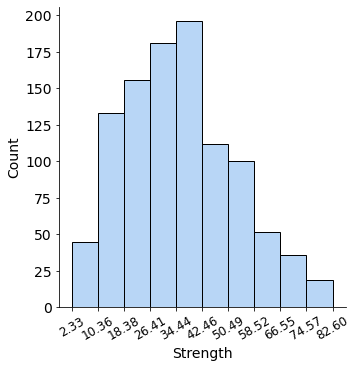

In [9]:
sns.displot(target, color=sns.color_palette("pastel")[0], bins=bin_edges)
plt.xticks(bin_edges, rotation = 30)
plt.show()

In [10]:
target.describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: Strength, dtype: float64

In [11]:
print('Median:{}'.format(target.median()))

Median:34.445


<h4 style='font-family: Trebuchet MS; color:#077F3F'> Observations</h4>
<p style='font-family: Trebuchet MS'> 
    <b>Shape</b>: The distribution of the compressive strength is <b>unimodal</b> & <b>right-skewed</b>. <br>
    <b>Center</b>: Centered at around <b>34.445</b> with most of the data is between <b>23.71 and 46.135</b>. <br>
    <b>Spread</b>: A range of roughly 83. <br>
    <b>Outliers</b>: There are no outliers. <br>
    I refer <a href='https://www.coursera.org/lecture/understanding-visualization-data/quantitative-data-histograms-5VDec'> here</a> while making this description.

<h3 style='font-family: Trebuchet MS; color:#077F3F'> Predictor Variables</h3>

In [12]:
predictors = df.drop(columns=['Strength'])

<h1 style='font-family: Trebuchet MS; color:#077F3F'> Feature Selection<a id='1'></a></h1>
<p style='font-family: Trebuchet MS'> Similar to other modelling, I would do a quick feature selection to choose which variables to be predictors to optimise the forecast.

<h3 style='font-family: Trebuchet MS; color:#077F3F'> Visualisation(Regression Plot)</h3>

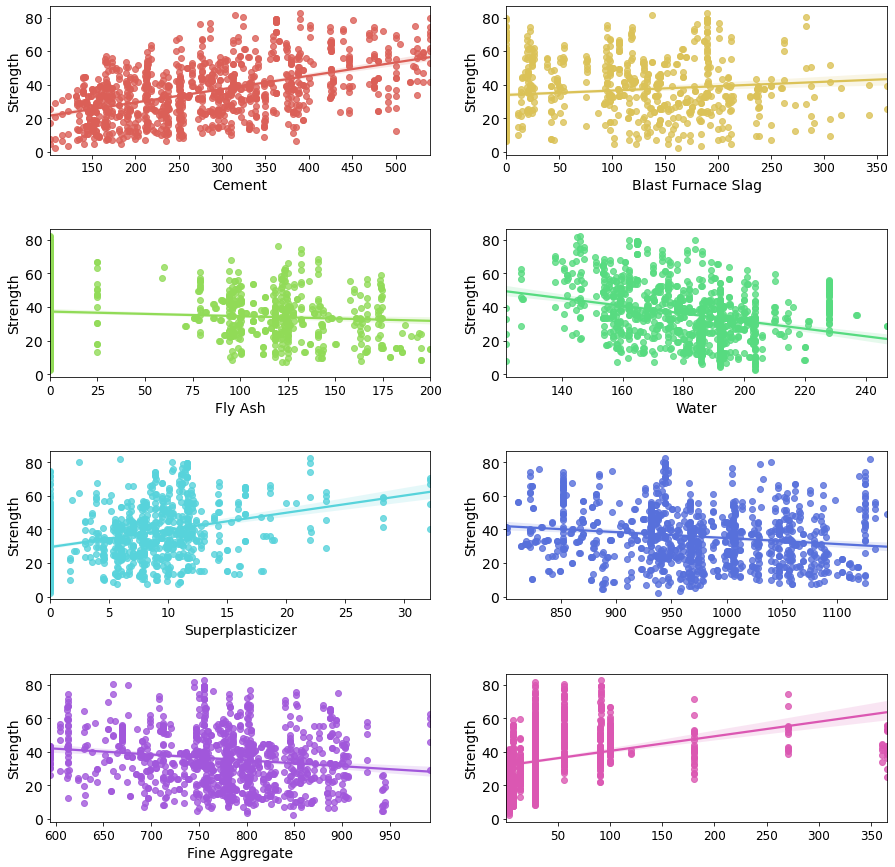

In [13]:
fig, axes = plt.subplots(round(len(df.columns)/2), 2, figsize=(15,15))
for ax, i, j in zip(axes.flatten(), df.columns, range(0,8)):
    sns.regplot(x=df[i],
                    y=df['Strength'],
                    data= df,
                    color = sns.color_palette("hls", 8)[j],
                    ax = ax)
    plt.subplots_adjust(wspace=0.2, hspace = 0.5)
    plt.xlabel('')
plt.show()

<h4 style='font-family: Trebuchet MS; color:#077F3F'> Observations</h4>
<p style='font-family: Trebuchet MS'> 1. Most of the predictors seem to have some linear relationship (even though very weak) with <code>Strength</code> except <code>Age</code>. <code>Age</code> seems to be a categorical variable(?)<br>
    2. <code>Cement</code> & <code>Superplasticizer</code> have weak positive linear relationship with <code>Strength</code>. <br>
    3. <code>Water</code>, <code>Coarse Aggregate</code> & <code>Weak Aggregate</code> have weak negative linear relationship with <code>Strength</code>. <br>
    4. <code>Blast Furnace Slag</code> & <code>Fly Ash</code> have no linear relationship with <code>Strength</code>. 

<h3 style='font-family: Trebuchet MS; color:#077F3F'> Correlation between predictors and target</h3>

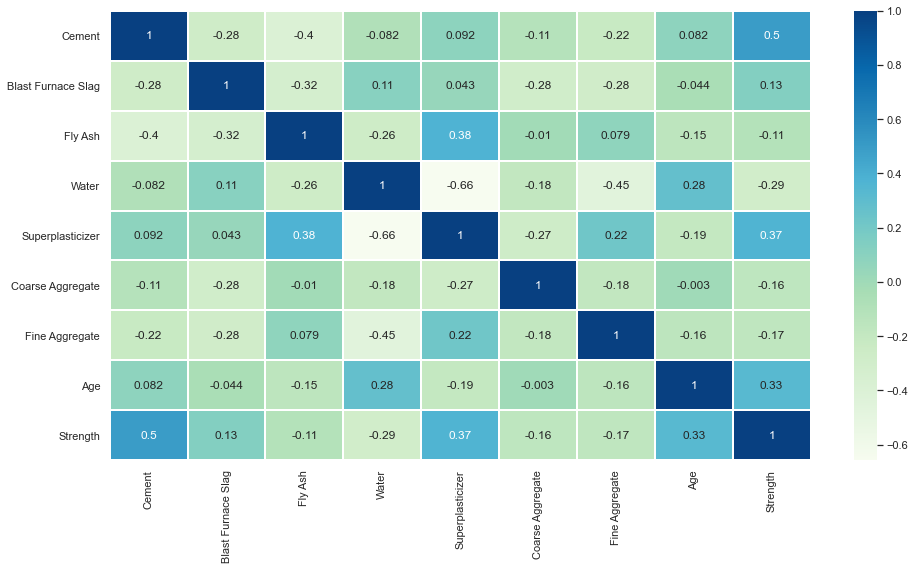

In [14]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.heatmap(df.corr(),
            annot=True,
            linewidth=1,
            cmap='GnBu')
plt.show()

<h4 style='font-family: Trebuchet MS; color:#077F3F'> Correlation Coeffecient Explanation:</h4>
<p style='font-family:Trebuchet MS'>
    Correlation Coefficient = +1: A perfect positive relationship.<br>
    Correlation Coefficient = 0.8: A fairly strong positive relationship.<br>
    Correlation Coefficient = 0.6: A moderate positive relationship.<br>
    Correlation Coefficient = 0: No relationship. As one value increases, there is no tendency for the other value to change in a specific direction.<br>
    Correlation Coefficient = -1: A perfect negative relationship.<br>

<h4 style='font-family: Trebuchet MS; color:#077F3F'> Observations</h4>
<p style='font-family: Trebuchet MS'> The magnitude of correlation coeffecients are realtively small infers that the correlations between predictors and target are quite weak which pretty much is align with the observations earlier. Thus, moving forward, I would use 0.2 as a 'critical point' to choose predictors. 

In [15]:
predictors_corr = df.corr()[(df.corr()['Strength']>0.2 )| (df.corr()['Strength']<-0.2)]['Strength'].index
predictors_corr = df[predictors_corr]
predictors_corr.columns

Index(['Cement', 'Water', 'Superplasticizer', 'Age', 'Strength'], dtype='object')

<h4 style='font-family: Trebuchet MS; color:#077F3F'> Conclusions</h4>
<p style='font-family: Trebuchet MS'> The predictors produced by feature selection would be <code>Cement, Water, Superplasticizer, Age</code> and named as <code>predictors_corr</code>. 

<h1 style='font-family: Trebuchet MS; color:#077F3F'> Keras<a id='2'></a></h1>
<p style='font-family: Trebuchet MS'> Similar to other model development and evaluations, I will compare the errors from predictors(with all predictors variables) and predictors_corr(those with coeffecient >0.2 or <-0.2)

<h3 style='font-family: Trebuchet MS; color:#077F3F'> Import Libraries</h3>

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense

<h3 style='font-family: Trebuchet MS; color:#077F3F'> Data Preparation</h3>

<h3 style='font-family: Trebuchet MS; color:#077F3F'> Import Libraries</h3>

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

<h3 style='font-family: Trebuchet MS; color:#077F3F'> Standardization</h3>

In [18]:
def standardization(predictors):
    scaler = StandardScaler()
    predictors_scaled = scaler.fit_transform(predictors)
    predictors_scaled = pd.DataFrame(predictors_scaled)
    predictors_scaled.columns = predictors.columns
    return predictors_scaled

In [19]:
predictors_scaled = standardization(predictors)
predictors_corr_scaled = standardization(predictors_corr)

<h3 style='font-family: Trebuchet MS; color:#077F3F'> Train set, Test set split</h3>

In [20]:
x_train, x_test, y_train, y_test = train_test_split(predictors_scaled, target, test_size=0.3, random_state=5)
x_train_corr, x_test_corr, y_train_corr, y_test_corr = train_test_split(predictors_corr_scaled, target, test_size=0.3, random_state=5)

<h3 style='font-family: Trebuchet MS; color:#077F3F'> Model Development (Neural Network)</h3>

In [21]:
def regression_model(ncols):
    model = Sequential()
    model.add(Dense(15,
                    activation= 'relu',
                    input_shape = (ncols,)))
    model.add(Dense(15,
                    activation= 'relu'))
    model.add(Dense(1))                   
    
    model.compile(optimizer = 'adam',
                  loss = 'mse')
    
    return model

In [22]:
corr_model = regression_model(predictors_corr.shape[1])
model = regression_model(predictors.shape[1])

In [23]:
model.fit(x_train, y_train, epochs=100, verbose=0)
corr_model.fit(x_train_corr, y_train_corr, epochs=100, verbose=0)

In [24]:
yhat = model.predict(x_test)
yhat_corr = corr_model.predict(x_test_corr)

<h3 style='font-family: Trebuchet MS; color:#077F3F'> Evaluation </h3>

<h4 style='font-family: Trebuchet MS; color:#077F3F'> Import Libraries </h4>

In [25]:
from sklearn.metrics import mean_squared_error 
from math import sqrt

<h4 style='font-family: Trebuchet MS; color:#077F3F'> Root Mean Squared Error </h4>

In [26]:
mse = mean_squared_error(y_test, yhat)
rmse = sqrt(mse)
mse_corr = mean_squared_error(y_test_corr, yhat_corr)
rmse_corr = sqrt(mse_corr)

In [27]:
mean_squared_error = pd.DataFrame([mse, mse_corr])
root_mean_squared_error = pd.DataFrame([rmse, rmse_corr])
error = pd.concat([mean_squared_error, root_mean_squared_error], axis=1)
error.columns = ['MSE', 'RMSE']

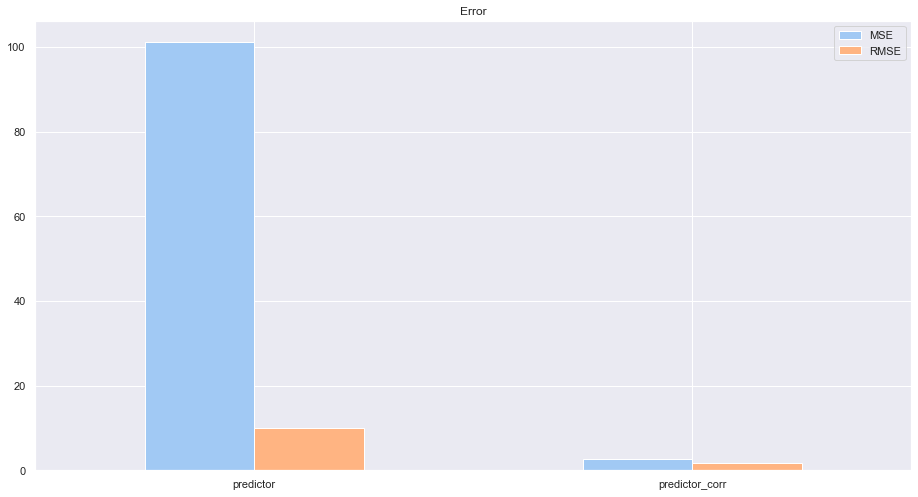

In [28]:
error.plot(kind='bar', color=sns.color_palette('pastel'))
plt.xticks(ticks=[0,1], labels=['predictor', 'predictor_corr'], rotation = 360)
plt.title('Error')
plt.show()

In [29]:
df['Strength'].describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: Strength, dtype: float64

<h4 style='font-family: Trebuchet MS; color:#077F3F'> Observations </h4>
<p style='font-family: Trebuchet MS'> <code>predictor_corr</code> performs better, it has smaller error compare to <code>predictor</code>.<br>

<h4 style='font-family: Trebuchet MS; color:#077F3F'> Visualization(Predicted Value vs Actual Value) (predictor vs predictor_corr) </h4>

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


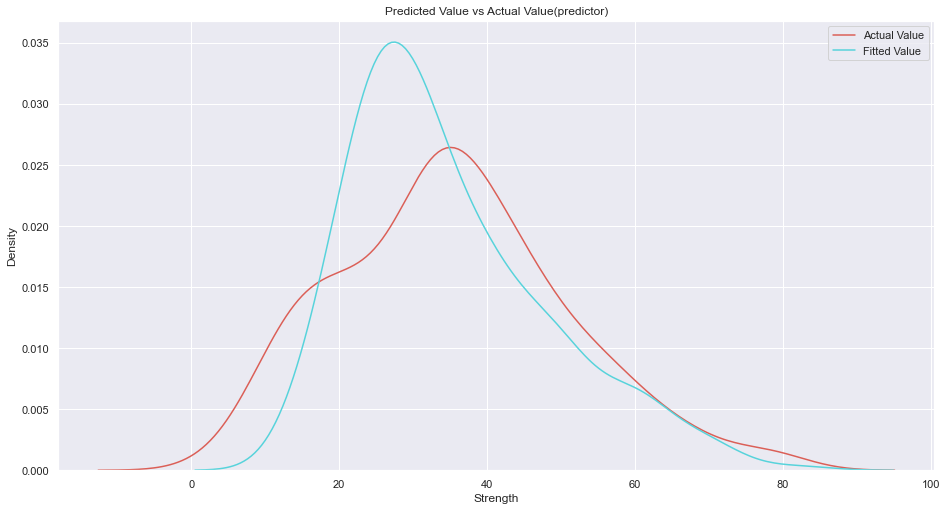

In [30]:
sns.distplot(y_test, color=sns.color_palette('hls')[0], bins=10, hist=False)
sns.distplot(yhat, color=sns.color_palette('hls')[3], bins=10, hist=False)
plt.title('Predicted Value vs Actual Value(predictor)')
plt.legend(['Actual Value', 'Fitted Value'])
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


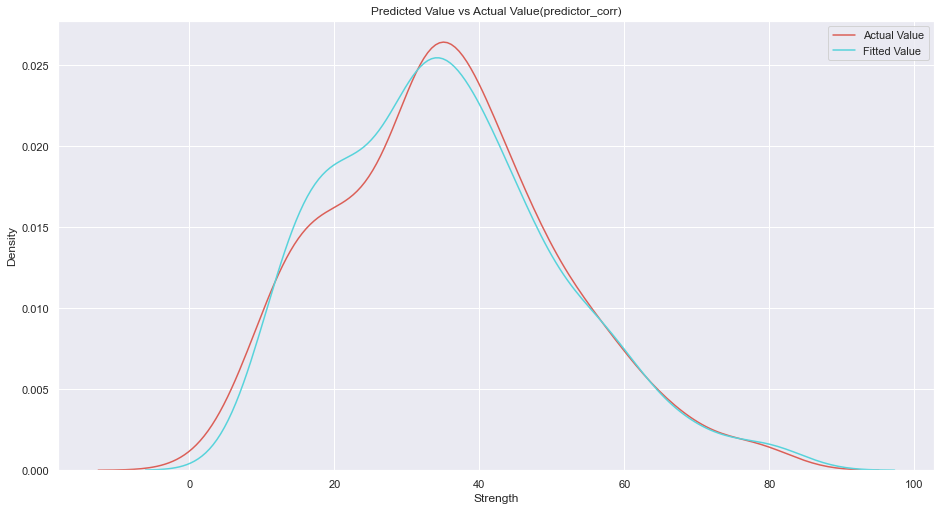

In [31]:
sns.distplot(y_test_corr, color=sns.color_palette('hls')[0], bins=10, hist=False)
sns.distplot(yhat_corr, color=sns.color_palette('hls')[3], bins=10, hist=False)
plt.title('Predicted Value vs Actual Value(predictor_corr)')
plt.legend(['Actual Value', 'Fitted Value'])
plt.show()

<h4 style='font-family: Trebuchet MS; color:#077F3F'> Observations </h4>
<p style='font-family: Trebuchet MS'> <code>predictor_corr</code> performs better, it has a better fit compare to <code>predictor</code>.<br>
    1. The predicted value from <code>predictor_corr</code> and the actual value has the same distribution: similar <b>shape</b> (unimodal & considerably bell-shaped(?)), <b>center</b>(both centered at around 30), <b>spread</b>(similar range) and no <b>outliers</b>.<br>
    2. The predicted value from <code>predictor</code> and the actual value has the relatively different distribution, different <b>shape</b> (predicted value is skewed to the right instead of bell-shaped), <b>center</b>(predicted value centered at a smaller value), though similar <b>spread</b> and no <b>outliers</b> from predicted value too.

<h4 style='font-family: Trebuchet MS; color:#077F3F'> Conclusions</h4>
<p style='font-family: Trebuchet MS'> <code>predictor_corr</code> performs better, it has a better fit compare to <code>predictor</code> from both error and histogram perspective. 